# Rayyan example

In [1]:
import numpy as np
import pandas
from IPython.core.display import display

import raha

In [2]:
datasets = []

for i in range(10):
    from raha import analysis_utilities
    app_1 = raha.Detection()
    app_2 = raha.Correction()

    # How many tuples would you label?
    app_1.LABELING_BUDGET = 20
    app_2.LABELING_BUDGET = 0

    # Would you like to see the logs?
    app_1.VERBOSE = False
    app_2.VERBOSE = False

    dataset_dictionary = {
        "name": "rayyan",
        "path": "datasets/rayyan/dirty.csv",
        "clean_path": "datasets/rayyan/clean.csv"
    }
    d = app_1.initialize_dataset(dataset_dictionary)

    app_1.run_strategies(d)
    app_1.generate_features(d)
    app_1.build_clusters(d)

    while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
        app_1.sample_tuple(d)
        if d.has_ground_truth:
            app_1.label_with_ground_truth(d)

    app_1.propagate_labels(d)
    app_1.predict_labels(d)

    app_2.initialize_models(d)
    app_2.initialize_dataset(d)
    for si in d.labeled_tuples:
        d.sampled_tuple = si
        app_2.update_models(d)
        app_2.generate_features(d)
        app_2.predict_corrections(d)

    print(f"Run {i} done")

    datasets.append(d)

I just load strategies' results as they have already been run on the dataset!


Run 0 done


I just load strategies' results as they have already been run on the dataset!


Run 1 done


I just load strategies' results as they have already been run on the dataset!


Run 2 done


I just load strategies' results as they have already been run on the dataset!


Run 3 done


I just load strategies' results as they have already been run on the dataset!


Run 4 done


I just load strategies' results as they have already been run on the dataset!


Run 5 done


I just load strategies' results as they have already been run on the dataset!


Run 6 done


I just load strategies' results as they have already been run on the dataset!


Run 7 done


I just load strategies' results as they have already been run on the dataset!


Run 8 done


I just load strategies' results as they have already been run on the dataset!


Run 9 done


## Evaluation

In [3]:
evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])

for d in datasets:
    edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
    ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

    evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": edp,
                                          "Recall": edr, "F1 Score": edf}, ignore_index=True)
    evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": ecp,
                                          "Recall": ecr, "F1 Score": ecf}, ignore_index=True)
display(evaluation_df)

evaluation_df.groupby("Task").agg(["mean", "std", "min", "max"])

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.811024,0.760549,0.784976
1,Error Correction (Baran),0.234637,0.088608,0.128637
2,Error Detection (Raha),0.849252,0.778481,0.812328
3,Error Correction (Baran),0.771318,0.209916,0.330017
4,Error Detection (Raha),0.863636,0.701477,0.774156
5,Error Correction (Baran),0.950739,0.203586,0.335361
6,Error Detection (Raha),0.844902,0.821730,0.833155
7,Error Correction (Baran),0.971129,0.390295,0.556810
8,Error Detection (Raha),0.822626,0.621308,0.707933
9,Error Correction (Baran),0.944238,0.267932,0.417420


Precision                                  Recall  \
                              mean       std       min       max      mean   
Task                                                                         
Error Correction (Baran)  0.790761  0.226050  0.234637  0.971129  0.231224   
Error Detection (Raha)    0.841388  0.042827  0.768072  0.907734  0.724051   

                                                        F1 Score            \
                               std       min       max      mean       std   
Task                                                                         
Error Correction (Baran)  0.085458  0.088608  0.390295  0.355368  0.119635   
Error Detection (Raha)    0.086823  0.537975  0.821730  0.776342  0.063066   

                                              
                               min       max  
Task                                          
Error Correction (Baran)  0.128637  0.556810  
Error Detection (Raha)    0.632754  0.833155

## Analyze the alternative repairs

In [4]:
alternative_count_list = []

for d in datasets:
    number_of_repairs = len(d.correction_collection)
    number_of_repairs_hist = dict()

    for cell_repairs in d.correction_collection.values():
        num = len(cell_repairs)
        number_of_repairs_hist[num] = number_of_repairs_hist.get(num, 0) + 1

    hist = [0] * (max(number_of_repairs_hist.keys()) + 1)
    for num, count in number_of_repairs_hist.items():
        hist[num] = count

    alternative_count_list.append(number_of_repairs_hist)

    #print(f"Histogram of the number of alternative repairs: {list(enumerate(hist))}")

max_alternatives = max(max(h.keys()) for h in alternative_count_list)

alternative_count_df = pandas.DataFrame(columns=list(range(max_alternatives + 1)))

for hist in alternative_count_list:
    alternative_count_df = alternative_count_df.append(hist, ignore_index=True)

alternative_count_df.drop(0,axis=1,inplace=True)
alternative_count_df = alternative_count_df.fillna(0)
alternative_count_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,301.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,226.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,177.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,357.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,226.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,222.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,208.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,187.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,7.0,1.0
8,224.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,308.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mean_number_of_repairs = (alternative_count_df * np.arange(1,max_alternatives+1,1)).sum(axis=1) / alternative_count_df.sum(axis=1)
mean_number_of_repairs.agg(["mean", "std", "min", "max"])

mean    1.237239
std     0.569132
min     1.002793
max     2.853448
dtype: float64

In [6]:
more_than_one = alternative_count_df.loc[:, alternative_count_df.columns[1:]].sum(axis=1) / alternative_count_df.sum(axis=1)
more_than_one.agg(["mean", "std", "min", "max"])

mean    0.066873
std     0.053280
min     0.002793
max     0.193966
dtype: float64

In [7]:
print("Mean number of cells with x predicted alternatives in 10 runs")
mean_count_series = alternative_count_df.mean()
mean_count_series

Mean number of cells with x predicted alternatives in 10 runs


1     243.6
2      13.5
3       0.2
4       0.1
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.1
14      2.3
15      0.7
16      0.1
dtype: float64

In [10]:
correct_repairs = datasets[0].get_actual_errors_dictionary()

collection = []
correct_repair_probs = []
incorrect_repair_probs = []
other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]
    #print(f"Number of incorrectly repaired cells: {len(error_repaired_cells)}")

    correct_repair_available = 0

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell].keys():
            correct_repair_available += 1

    #print(f"Number of incorrectly repaired cells, where the correct repair is among the alternative repairs: {correct_repair_available}")

    collection.append((len(error_repaired_cells),correct_repair_available))

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell]:
            correct_repair_probs.append(d.correction_collection[cell][correct_repairs[cell]])
            incorrect_repair_probs.append(d.correction_confidences[cell])
            other_repair_probs.append([prob for val, prob in d.correction_collection[cell].items()
                                       if val not in [correct_repairs[cell], d.corrected_cells[cell]]])

repairable_df = pandas.DataFrame(collection, columns=["errors","repairs"])
repairable_df["repair_percentage"] = repairable_df["repairs"] / repairable_df["errors"]
print(repairable_df["repair_percentage"].agg(["mean", "std", "min", "max"]))

mean    0.102172
std     0.146571
min     0.000000
max     0.461538
Name: repair_percentage, dtype: float64


In [11]:
print(pandas.Series(correct_repair_probs).agg(["mean", "std", "min", "max"]))

np.histogram(correct_repair_probs,np.linspace(0.5,1.0,101))

mean    9.999999e-01
std     9.606175e-07
min     9.999933e-01
max     1.000000e+00
dtype: float64


(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 49]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.8

In [12]:
print(pandas.Series(incorrect_repair_probs).agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs,np.linspace(0.5,1.0,101))

mean    0.989796
std     0.071429
min     0.500000
max     1.000000
dtype: float64


(array([ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 48]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.8

In [13]:
flat_others = [value for sublist in other_repair_probs for value in sublist]

print(pandas.Series(flat_others).agg(["mean", "std", "min", "max"]))

np.histogram(flat_others,np.linspace(0.5, 1.0, 101))

mean   NaN
std    NaN
min    NaN
max    NaN
dtype: float64


<ipython-input-13-292303105bcd>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  print(pandas.Series(flat_others).agg(["mean", "std", "min", "max"]))


(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
        0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
        0.905, 0.91

In [14]:
correct_s = pandas.Series(correct_repair_probs)
incorrect_s = pandas.Series(incorrect_repair_probs)
max_other_s = pandas.Series(max(other + [0]) for other in other_repair_probs)

print(len(correct_s))

print((correct_s > max_other_s).sum() / len(correct_s))
print((correct_s > incorrect_s).sum() / len(correct_s))
print((correct_s == incorrect_s).sum() / len(correct_s))
print((correct_s >= incorrect_s).sum() / len(correct_s))
print(((correct_s > incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s == incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) | (max_other_s >= incorrect_s)).sum() / len(correct_s))

abs(correct_s - incorrect_s).describe()

49
1.0
0.02040816326530612
0.8979591836734694
0.9183673469387755
0.02040816326530612
0.8979591836734694
0.9183673469387755
0.9183673469387755


count    49.000000
mean      0.010204
std       0.071428
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.499993
dtype: float64

In [15]:
other_count = pandas.Series(len(other) for other in other_repair_probs)
print((other_count == 0).sum() / len(other_count))

print(((correct_s > max_other_s) & (other_count > 0)).sum() / (other_count > 0).sum())

1.0
nan


<ipython-input-15-1b87db7edbb1>:4: RuntimeWarning: invalid value encountered in long_scalars
  print(((correct_s > max_other_s) & (other_count > 0)).sum() / (other_count > 0).sum())


In [16]:
incorrect_repair_probs_full = []
max_other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]

    for cell in error_repaired_cells:
        incorrect_repair_probs_full.append(d.correction_confidences[cell])
        max_other_repair_probs.append(max([prob for val, prob in d.correction_collection[cell].items()
                                   if val != d.corrected_cells[cell]] + [0]))

In [19]:
print(len(incorrect_repair_probs_full))
print(len(max_other_repair_probs))

incorrect_repair_probs_full = pandas.Series(incorrect_repair_probs_full)
max_other_repair_probs = pandas.Series(max_other_repair_probs)

print((max_other_repair_probs > incorrect_repair_probs_full).sum() / len(max_other_repair_probs))
print((max_other_repair_probs == incorrect_repair_probs_full).sum() / len(max_other_repair_probs))

print(incorrect_repair_probs_full.agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs_full, np.linspace(0.5,1.0,101))

511
511
0.0547945205479452
0.0958904109589041
mean    0.955536
std     0.138205
min     0.500000
max     1.000000
dtype: float64


(array([ 34,   0,   0,   0,   0,   0,   0,   1,   3,   0,   0,   0,   0,
          2,   1,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  29, 434]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        

## Analyze confidence vs error probability

In [10]:
import importlib
from raha import analysis_utilities
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.ion()

In [11]:
importlib.reload(analysis_utilities)

<module 'raha.analysis_utilities' from '/home/adrian/source/MA/raha/raha/analysis_utilities.py'>

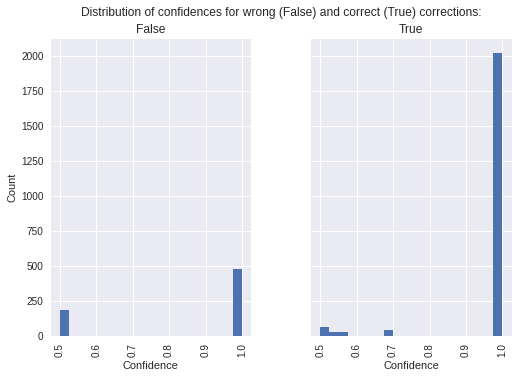

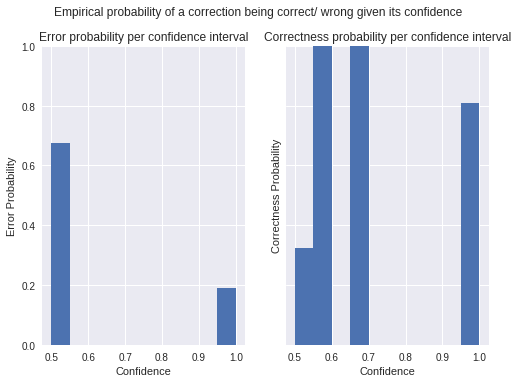

In [12]:
r_p_dfs = []

for d in datasets:

    r_p_dfs.append(analysis_utilities.get_correction_confidence_df(d))

r_p_df = pandas.concat(r_p_dfs)

display(analysis_utilities.correction_confidence_distributions(r_p_df))
display(analysis_utilities.correction_correctness_by_confidence(r_p_df, number_of_bins=10))

## Analyze detection confidence vs error probability

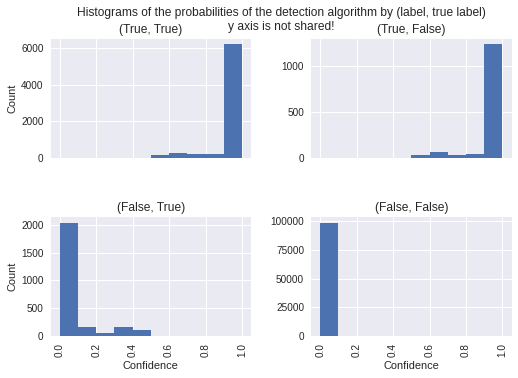

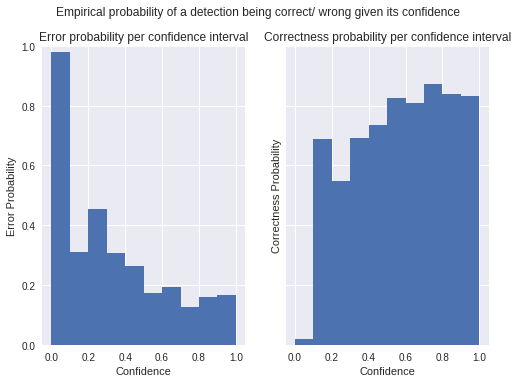

In [13]:
evaluation_dfs = []

for d in datasets:
    df = analysis_utilities.get_detection_evaluation_df(d)
    evaluation_dfs.append(df)
    #display(df)
    #display(df.value_counts(subset=["detected", "truth"]))
    #display(analysis_utilities.detection_evaluation(df))
    #display(analysis_utilities.detection_correctness_by_confidence(df,number_of_bins=10))

df = pandas.concat(evaluation_dfs)
display(analysis_utilities.detection_evaluation(df))
display(analysis_utilities.detection_correctness_by_confidence(df))

In [15]:
1 - ((df["p"] < 0.05) | (df["p"] > 0.95)).sum() / len(df.index)

0.01960909090909091